# Data Analysis


In [ ]:
import piplite
await piplite.install(['seaborn', 'lxml', 'openpyxl'])

import pandas as pd

<ipython-input-1-3ed9e9df0608>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from pyodide.http import pyfetch

**Context:** This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.


In [ ]:
# Import pandas library
import pandas as pd

<ipython-input-1-2b170f6158d4>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "diabetes.csv")
df = pd.read_csv("diabetes.csv")

After reading the dataset, we can use the **dataframe.head(n)** method to check the top n rows of the dataframe, where n is an integer. Contrary to **dataframe.head(n)**, **dataframe.tail(n)** will show you the bottom n rows of the dataframe.


In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe")
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To view the dimensions of the dataframe, we use the **`.shape`** parameter.


In [ ]:
df.shape

(768, 9)

# Statistical Overview of dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pandas **describe()** is used to view some basic statistical details like percentile, mean, standard deviation, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output


### Identify and handle missing values


We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

**.isnull()**

**.notnull()**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method ".value_counts()"  counts the number of "True" values.
</p>


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64

Glucose
Glucose
False    768
Name: count, dtype: int64

BloodPressure
BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
SkinThickness
False    768
Name: count, dtype: int64

Insulin
Insulin
False    768
Name: count, dtype: int64

BMI
BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
Age
False    768
Name: count, dtype: int64

Outcome
Outcome
False    768
Name: count, dtype: int64



As you can see above, there is no missing values in the dataset.


<h3 id="correct_data_format">Correct data format</h3>

<p>Check all data is in the correct format (int, float, text or other).</p>

In Pandas, we use

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

Numerical variables should have type **'float'** or **'int'**.


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

As we can see above, All columns have the correct data type.


# Visualization


**Visualization** is one of the best way to get insights from the dataset. **Seaborn** and **Matplotlib** are two of Python's most powerful visualization libraries.


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

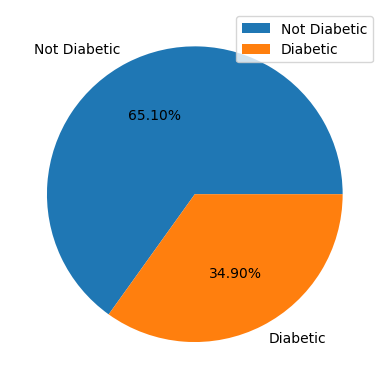

In [ ]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

As you can see above, 65.10% females are not Diabetic and 34.90% are Diabetic.


# Thank you for completing this Notebook


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description |
| ----------------- | ------- | ------------- | ------------------ |
| 2023-11-02 | 1.1 | Abhishek Gagneja | Updated instructions |
| 2023-06-11        | 1.0     | Akansha yadav   | Spell check
| 2022-01-25        | 0.1     | Lakshmi Holla | added read_xml     |
